In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import scipy
pi = np.pi
import PhyPraKit as ppk

#initialize new circuit and  simulator (code not needed anymore)
shots = 5000

#Arrays, that store the value of U at time t
time_evolution_BK_i = np.zeros(n)
time_evolution_BK_r = np.zeros(n)
time_evolution_JW_i = np.zeros(n)
time_evolution_JW_r = np.zeros(n)
qreg = QuantumRegister(5)
creg = ClassicalRegister(1)
circ = QuantumCircuit(qreg, creg)
simulator = Aer.get_backend('aer_simulator')

#BK Hamiltonian for increasing t (not used)
cUnBK = np.array([])
for i in range(n):
    qr = QuantumRegister(4)
    qc = QuantumCircuit(qr)
    #Trotter part I
    
    #IIIZ
    qc.rz(0.17218393261915543*t[i], qr[3])
    
    #IIZZ
    qc.cx(qr[2], qr[3])
    qc.rz(- 0.2257534922240237*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    
    #IZII
    qc.rz(0.17218393261915543*t[i], qr[1])
    
    #ZZZI
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])
    qc.rz(-0.22575349222402363*t[i], qr[2])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[0], qr[1])
    
    #IIZI
    qc.rz(0.12091263261776633*t[i], qr[2])
    
    #IZIZ
    qc.cx(qr[1], qr[3])
    qc.rz(0.16892753870087907*t[i], qr[3])
    qc.cx(qr[1], qr[3])
    
    #ZZZZ
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[2], qr[3])
    qc.rz(0.1661454325638241*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[0], qr[1])
    
    #IZZZ
    qc.cx(qr[1], qr[2])
    qc.cx(qr[2], qr[3])
    qc.rz(0.1661454325638241*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    
    #ZZIZ
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[3])
    qc.rz(0.1746434306830045*t[i], qr[3])
    qc.cx(qr[1], qr[3])
    qc.cx(qr[0], qr[1])
    
    #ZIZI
    qc.cx(qr[0], qr[2])
    qc.rz(0.12091263261776633*t[i], qr[2])
    qc.cx(qr[0], qr[2])

    #Trotter part II
    #ZXIX
    qc.h(qr[1])
    qc.h(qr[3])
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[3])
    qc.rz(0.045232799946057826*t[i], qr[3])
    qc.cx(qr[1], qr[3])
    qc.cx(qr[0], qr[1])
    
    #IXZX
    qc.cx(qr[1], qr[2])
    qc.cx(qr[2], qr[3])
    qc.rz(-0.045232799946057826*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    
    #ZXZX
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[2], qr[3])
    qc.rz(-0.045232799946057826*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[0], qr[1])
    
    #IXIX
    qc.cx(qr[1], qr[3])
    qc.rz(-0.045232799946057826*t[i], qr[3])
    qc.cx(qr[1], qr[3])
    qc.h(qr[1])
    qc.h(qr[3])

    #create controlled version of time-evolution operator U
    cUnBK = np.append(cUnBK, qc.to_gate().control(1))
    qc.clear()

#Note: Does not work, due to wrong frequencies as a result

#simulate BK Hamiltonian for real part of U, t increasing, one Trotter step (not needed anymore)
for i in range(n):
    circ.h(qreg[4])
    circ.x(qreg[0])
    #circ.x(qreg[1])
    circ.x(qreg[2])
    #circ.x(qreg[3])
    circ.append(cUnBK[i], [4, 0, 1, 2, 3])
    circ.h(qreg[4])
    circ.measure(qreg[4], creg[0])

    circ = transpile(circ, simulator)
    result = simulator.run(circ, shots=shots).result()
    counts = result.get_counts(0)
    if '1' in counts:
        time_evolution_BK_r[i] = (counts['0'] - counts['1']) / shots
    else:
        time_evolution_BK_r[i] = 1
    circ.clear()


#Jordan Wigner U, increasing t (not used)
cUnJW = np.array([])
for i in range(n):
    qc.rz(0.1721839326191555*t[i], qr[3])
    
    qc.rz(- 0.2257534922240236*t[i], qr[2])
    
    qc.rz(0.1721839326191555*t[i], qr[1])
    
    qc.rz(- 0.2257534922240236*t[i], qr[0])
    
    qc.cx(qr[2], qr[3])
    qc.rz(0.12091263261776633*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    
    qc.cx(qr[1], qr[3])
    qc.rz(0.16892753870087907*t[i], qr[3])
    qc.cx(qr[1], qr[3])
    
    #YYYY
    qc.rx(-pi/2, qr[0])
    qc.rx(-pi/2, qr[1])
    qc.rx(-pi/2, qr[2])
    qc.rx(-pi/2, qr[3])
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[2], qr[3])
    qc.rz(0.045232799946057826*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[0], qr[1])
    qc.rx(pi/2, qr[0])
    qc.rx(pi/2, qr[1])
    
    #XXYY
    qc.h(qr[0])
    qc.h(qr[1])
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[2], qr[3])
    qc.rz(0.045232799946057826*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[0], qr[1])
    qc.rx(pi/2, qr[2])
    qc.rx(pi/2, qr[3])
    
    #XXXX
    qc.h(qr[2])
    qc.h(qr[3])
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[2], qr[3])
    qc.rz(0.045232799946057826*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[0], qr[1])
    qc.h(qr[0])
    qc.h(qr[1])
    
    #YYXX
    qc.rx(-pi/2, qr[0])
    qc.rx(-pi/2, qr[1])
    qc.cx(qr[0], qr[1])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[2], qr[3])
    qc.rz(0.045232799946057826*t[i], qr[3])
    qc.cx(qr[2], qr[3])
    qc.cx(qr[1], qr[2])
    qc.cx(qr[0], qr[1])
    qc.rx(pi/2, qr[0])
    qc.rx(pi/2, qr[1])
    qc.h(qr[2])
    qc.h(qr[3])
    
    #ZIIZ
    qc.cx(qr[0], qr[3])
    qc.rz(0.1661454325638241*t[i], qr[3])
    qc.cx(qr[0], qr[3])
    
    #IZZI
    qc.cx(qr[1], qr[2])
    qc.rz(0.1661454325638241*t[i], qr[2])
    qc.cx(qr[1], qr[2])
    
    #ZIZI
    qc.cx(qr[0], qr[2])
    qc.rz(0.1746434306830045*t[i], qr[2])
    qc.cx(qr[0], qr[2])
    
    #ZZII
    qc.cx(qr[0], qr[1])
    qc.rz(0.12091263261776633*t[i], qr[1])
    qc.cx(qr[0], qr[1])
    
    cUnJW = np.append(cUnJW, qc.to_gate().control(1))
    qc.clear()

#simulate JW Hamiltonian for real part of U, t increasing, one Trotter step (not needed anymore)
for i in range(n):
    circ.h(qreg[4])
    circ.x(qreg[0])
    #circ.x(qreg[1])
    circ.x(qreg[2])
    #circ.x(qreg[3])
    circ.append(cUnJW[i], [4, 0, 1, 2, 3])
    circ.h(qreg[4])
    circ.measure(qreg[4], creg[0])

    circ = transpile(circ, simulator)
    result = simulator.run(circ, shots=shots).result()
    counts = result.get_counts(0)
    if '1' in counts and '0' in counts:
        time_evolution_JWn_r[i] = (counts['0'] - counts['1']) / shots
    elif '1' in counts:
        time_evolution_JWn_r[i] = -1
    else:
        time_evolution_JWn_r[i] = 1
    circ.clear()

#Note: yields wrong frequencies, therefore won't be used

In [51]:
# initialize the samplingrate (inverse trotter step size), 8 proved to be the smallest step size to still obtain good results with the fourier algorithm
sampling_rate = 4
# points in time, at which U is simulated
t = np.arange(0, 3.5, 1/sampling_rate)
n = len(t)

# initialize Quantum Circuit
qr = QuantumRegister(4)
qc = QuantumCircuit(qr)

#Bravyi-Kitaev Hamiltonian one Trotter step
#Trotter part I

#IIII
qc.p(-0.8126107248852139/sampling_rate, qr[0])
qc.x(qr[0])
qc.p(-0.8126107248852139/sampling_rate, qr[0])
qc.x(qr[0])

#IIIZ
qc.rz(2*0.17218393261915543/sampling_rate, qr[3])
    
#IIZZ
qc.cx(qr[2], qr[3])
qc.rz(- 2*0.2257534922240237/sampling_rate, qr[3])
qc.cx(qr[2], qr[3])
    
#IZII
qc.rz(2*0.17218393261915543/sampling_rate, qr[1])
    
#ZZZI
qc.cx(qr[0], qr[1])
qc.cx(qr[1], qr[2])
qc.rz(-2*0.22575349222402363/sampling_rate, qr[2])
qc.cx(qr[1], qr[2])
qc.cx(qr[0], qr[1])
    
#IIZI
qc.rz(2*0.12091263261776633/sampling_rate, qr[2])
    
#IZIZ
qc.cx(qr[1], qr[3])
qc.rz(2*0.16892753870087907/sampling_rate, qr[3])
qc.cx(qr[1], qr[3])
    
#ZZZZ
qc.cx(qr[0], qr[1])
qc.cx(qr[1], qr[2])
qc.cx(qr[2], qr[3])
qc.rz(2*0.1661454325638241/sampling_rate, qr[3])
qc.cx(qr[2], qr[3])
qc.cx(qr[1], qr[2])
qc.cx(qr[0], qr[1])
    
#IZZZ
qc.cx(qr[1], qr[2])
qc.cx(qr[2], qr[3])
qc.rz(2*0.1661454325638241/sampling_rate, qr[3])
qc.cx(qr[2], qr[3])
qc.cx(qr[1], qr[2])
    
#ZZIZ
qc.cx(qr[0], qr[1])
qc.cx(qr[1], qr[3])
qc.rz(2*0.1746434306830045/sampling_rate, qr[3])
qc.cx(qr[1], qr[3])
qc.cx(qr[0], qr[1])
    
#ZIZI
qc.cx(qr[0], qr[2])
qc.rz(2*0.12091263261776633/sampling_rate, qr[2])
qc.cx(qr[0], qr[2])

#Trotter part II
#ZXIX
qc.h(qr[1])
qc.h(qr[3])
qc.cx(qr[0], qr[1])
qc.cx(qr[1], qr[3])
qc.rz(2*0.045232799946057826/sampling_rate, qr[3])
qc.cx(qr[1], qr[3])
qc.cx(qr[0], qr[1])
    
#IXZX
qc.cx(qr[1], qr[2])
qc.cx(qr[2], qr[3])
qc.rz(-2*0.045232799946057826/sampling_rate, qr[3])
qc.cx(qr[2], qr[3])
qc.cx(qr[1], qr[2])
    
#ZXZX
qc.cx(qr[0], qr[1])
qc.cx(qr[1], qr[2])
qc.cx(qr[2], qr[3])
qc.rz(-2*0.045232799946057826/sampling_rate, qr[3])
qc.cx(qr[2], qr[3])
qc.cx(qr[1], qr[2])
qc.cx(qr[0], qr[1])
    
#IXIX
qc.cx(qr[1], qr[3])
qc.rz(-2*0.045232799946057826/sampling_rate, qr[3])
qc.cx(qr[1], qr[3])
qc.h(qr[1])
qc.h(qr[3])

cUBK = qc.to_gate().control(1)
qc.clear()

# Jordan Wigner Hamiltonian one trotter step
#IIII
qc.p(0.8126107248852139/sampling_rate, qr[0])
qc.x(qr[0])
qc.p(0.8126107248852139/sampling_rate, qr[0])
qc.x(qr[0])

#IIIZ
qc.rz(2*0.17120123768237194/sampling_rate, qr[3])

#IIZI
qc.rz(-2*0.22279639536026685/sampling_rate, qr[2])

#IZII
qc.rz(2*0.17120123768237194/sampling_rate, qr[1])

#ZIII
qc.rz(-2*0.22279639536026685/sampling_rate, qr[0])

#IIZZ
qc.cx(qr[2], qr[3])
qc.rz(2*0.12054612726205871/sampling_rate, qr[3])
qc.cx(qr[2], qr[3])

#IZIZ
qc.cx(qr[1], qr[3])
qc.rz(2*0.168623275831502/sampling_rate, qr[3])
qc.cx(qr[1], qr[3])

#ZIIZ
qc.cx(qr[0], qr[3])
qc.rz(2*0.16586801121514025/sampling_rate, qr[3])
qc.cx(qr[0], qr[3])
    
#IZZI
qc.cx(qr[1], qr[2])
qc.rz(2*0.16586801121514025/sampling_rate, qr[2])
qc.cx(qr[1], qr[2])
    
#ZIZI
qc.cx(qr[0], qr[2])
qc.rz(2*0.17434948745510506/sampling_rate, qr[2])
qc.cx(qr[0], qr[2])
    
#ZZII
qc.cx(qr[0], qr[1])
qc.rz(2*0.12054612726205871/sampling_rate, qr[1])
qc.cx(qr[0], qr[1])
    
#YYYY
qc.rx(-pi/2, qr[0])
qc.rx(-pi/2, qr[1])
qc.rx(-pi/2, qr[2])
qc.rx(-pi/2, qr[3])
qc.cx(qr[0], qr[1])
qc.cx(qr[1], qr[2])
qc.cx(qr[2], qr[3])
qc.rz(2*0.04532188395308155/sampling_rate, qr[3])
qc.cx(qr[2], qr[3])
qc.cx(qr[1], qr[2])
qc.cx(qr[0], qr[1])
qc.rx(pi/2, qr[0])
qc.rx(pi/2, qr[1])
qc.rx(pi/2, qr[2])
qc.rx(pi/2, qr[3])
    
#XXXX
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])
qc.cx(qr[0], qr[1])
qc.cx(qr[1], qr[2])
qc.cx(qr[2], qr[3])
qc.rz(2*0.04532188395308155/sampling_rate, qr[3])
qc.cx(qr[2], qr[3])
qc.cx(qr[1], qr[2])
qc.cx(qr[0], qr[1])
qc.h(qr[0])
qc.h(qr[1])
qc.h(qr[2])
qc.h(qr[3])

#XXYY
qc.h(qr[0])
qc.h(qr[1])
qc.rx(-pi/2, qr[2])
qc.rx(-pi/2, qr[3])
qc.cx(qr[0], qr[1])
qc.cx(qr[1], qr[2])
qc.cx(qr[2], qr[3])
qc.rz(2*0.04532188395308155/sampling_rate, qr[3])
qc.cx(qr[2], qr[3])
qc.cx(qr[1], qr[2])
qc.cx(qr[0], qr[1])
qc.h(qr[0])
qc.h(qr[1])
qc.rx(pi/2, qr[2])
qc.rx(pi/2, qr[3])
    
#YYXX
qc.rx(-pi/2, qr[0])
qc.rx(-pi/2, qr[1])
qc.h(qr[2])
qc.h(qr[3])
qc.cx(qr[0], qr[1])
qc.cx(qr[1], qr[2])
qc.cx(qr[2], qr[3])
qc.rz(2*0.04532188395308155/sampling_rate, qr[3])
qc.cx(qr[2], qr[3])
qc.cx(qr[1], qr[2])
qc.cx(qr[0], qr[1])
qc.rx(pi/2, qr[0])
qc.rx(pi/2, qr[1])
qc.h(qr[2])
qc.h(qr[3])

cUJW = qc.to_gate().control(1)
qc.clear()

# initialize new circuit and  simulator
shots = 10000
# Arrays, that store the value of U at time t
time_evolution_BK_i = np.zeros(n)
time_evolution_BK_r = np.zeros(n)
time_evolution_JW_i = np.zeros(n)
time_evolution_JW_r = np.zeros(n)
qreg = QuantumRegister(5)
creg = ClassicalRegister(1)
circ = QuantumCircuit(qreg, creg)
simulator = Aer.get_backend('aer_simulator')

In [22]:
# simulate BK Hamiltonian for real part of U, t fixed, Trotter steps increasing
for i in range(n):
    circ.h(qreg[4])
    #circ.x(qreg[0])
    circ.x(qreg[1])
    #circ.x(qreg[2])
    #circ.x(qreg[3])
    for _ in range(i):
        circ.append(cUBK, [4, 0, 1, 2, 3])
    circ.h(qreg[4])
    circ.measure(qreg[4], creg[0])

    circ = transpile(circ, simulator)
    result = simulator.run(circ, shots=shots).result()
    counts = result.get_counts(0)
    if '1' in counts and '0' in counts:
        time_evolution_BK_r[i] = (counts['0'] - counts['1']) / shots
    elif '1' in counts:
        time_evolution_BK_r[i] = -1
    else:
        time_evolution_BK_r[i] = 1
    circ.clear()

In [14]:
# simulate BK Hamiltonian for imaginary part of U, t fixed, Trotter steps increasing
for i in range(n):
    circ.h(qreg[4])
    circ.p(-pi/2, qreg[4])
    #circ.x(qreg[0])
    circ.x(qreg[1])
    #circ.x(qreg[2])
    #circ.x(qreg[3])
    for _ in range(i):
        circ.append(cUBK, [4, 0, 1, 2, 3])
    circ.h(qreg[4])
    circ.measure(qreg[4], creg[0])

    circ = transpile(circ, simulator)
    result = simulator.run(circ, shots=shots).result()
    counts = result.get_counts(0)
    if '1' in counts and '0' in counts:
        time_evolution_BK_i[i] = (counts['0'] - counts['1']) / shots
    elif '1' in counts:
        time_evolution_BK_i[i] = -1
    else:
        time_evolution_BK_i[i] = 1
    circ.clear()
    

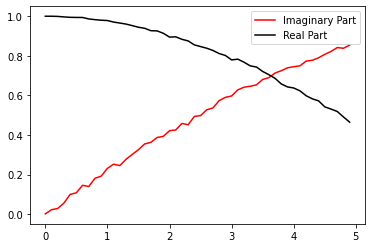

In [15]:
# Plot of the time evolution
plt.plot(t, time_evolution_BK_i, 'r-', label='Imaginary Part')

plt.plot(t, time_evolution_BK_r, 'k-', label='Real Part')
plt.legend()

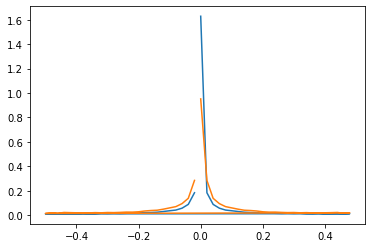

In [16]:
# Fourier analysis of the BK time evolution, to obtain frequencies and thus eigenenergies

# Real Part
fourier_BK_r = 2* np.abs(np.fft.fft(time_evolution_BK_r)/ n)
N = len(fourier_BK_r)
freqs_BK_r = np.fft.fftfreq(N, 1)
plt.plot(freqs_BK_r, fourier_BK_r, label='Real Part')

# Imaginary Part
fourier_BK_i = 2* np.abs(np.fft.fft(time_evolution_BK_i)/ n)
N = len(fourier_BK_i)
freqs_BK_i = np.fft.fftfreq(N, 1)
plt.plot(freqs_BK_i, fourier_BK_i, label='Imaginary Part')

In [86]:
peak_index_BK_i = scipy.signal.find_peaks(fourier_BK_i, height=0.11)[0]
omega_BK_i = freqs_BK_i[peak_index_BK_i[0]]


omega_BK_i

0.05

Text(0, 0.5, 'Re(U)')

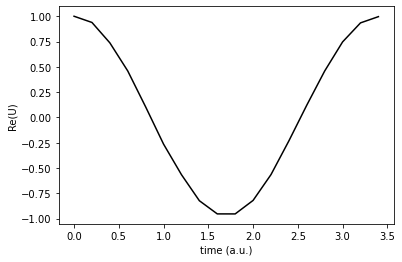

In [49]:
# simulate JW Hamiltonian for real part of U, t fixed, Trotter steps increasing
for i in range(n):
    circ.h(qreg[4])
    
    # set the initial state
    #circ.x(qreg[0])
    circ.x(qreg[1])
    #circ.x(qreg[2])
    circ.x(qreg[3])
    
    #perform Hadamard test
    for _ in range(i):
        circ.append(cUJW, [4, 0, 1, 2, 3])
    circ.h(qreg[4])
    circ.measure(qreg[4], creg[0])
    
    # simulate the quatum circuit classically and get the results
    circ = transpile(circ, simulator)
    result = simulator.run(circ, shots=shots).result()
    counts = result.get_counts(0)
    if '1' in counts and '0' in counts:
        time_evolution_JW_r[i] = (counts['0'] - counts['1']) / shots
    elif '1' in counts:
        time_evolution_JW_r[i] = -1
    else:
        time_evolution_JW_r[i] = 1
    circ.clear()

plt.plot(t, time_evolution_JW_r, 'k-')
plt.xlabel('time (a.u.)')
plt.ylabel('Re(U)')

In [9]:
# simulate JW Hamiltonian for imaginary part of U, t fixed, Trotter steps increasing
for i in range(n):
    circ.h(qreg[4])
    circ.p(-pi/2, qreg[4])
    circ.x(qreg[0])
    #circ.x(qreg[1])
    circ.x(qreg[2])
    #circ.x(qreg[3])
    for _ in range(i):
        circ.append(cUJW, [4, 0, 1, 2, 3])
    circ.h(qreg[4])
    circ.measure(qreg[4], creg[0])

    circ = transpile(circ, simulator)
    result = simulator.run(circ, shots=shots).result()
    counts = result.get_counts(0)
    if '1' in counts and '0' in counts:
        time_evolution_JW_i[i] = (counts['0'] - counts['1']) / shots
    elif '1' in counts:
        time_evolution_JW_i[i] = -1
    else:
        time_evolution_JW_i[i] = 1
    circ.clear()
    
plt.plot(t, time_evolution_JW_i, 'k-')
plt.xlabel('time (a.u.)')
plt.ylabel('Im(U)')

1.7453292519943295

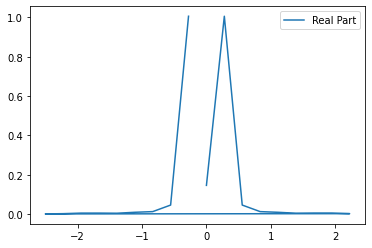

In [50]:
# Perform Fourier Analysis for the real part of U
fourier_JW_r = 2 * np.abs(scipy.fft.fft(time_evolution_JW_r)/ n)
N = len(fourier_JW_r)
freqs_JW_r = scipy.fft.fftfreq(N, 1/sampling_rate)
plt.plot(freqs_JW_r, fourier_JW_r, label='Real Part')
plt.legend()

# Get frequencies for the Real Part
peak_index_JW_r = scipy.signal.find_peaks(fourier_JW_r, height=0.2)[0]
omega_JW_r = freqs_JW_r[peak_index_JW_r[0]]
omega_JW_r * 2 * pi

# Imaginary Part
#fourier_JW_i = 2 * np.abs(np.fft.fft(time_evolution_JW_i)/ n)
#N = len(fourier_JW_i)
#freqs_JW_i = np.fft.fftfreq(N, 1/sampling_rate)
#plt.plot(freqs_JW_i, fourier_JW_i, label='Imaginary Part')
#plt.legend()

# Get frequencies for the Imaginary Part
#peak_index_JW_i = scipy.signal.find_peaks(fourier_JW_i[:80], height=0.2)[0]
#omega_JW_i = freqs_JW_i[peak_index_JW_i[0]]

#omega_JW_i

In [16]:
k = len(time_evolution_JW_r)
y_data = np.zeros(k)
for i in range(k):
    y_data[i] = np.arccos(time_evolution_JW_r[i])

def linear(x, m=1):
    return m*x
omega = scipy.optimize.curve_fit(linear, t[:8], y_data[:8])[0][0]
omega

1.8257448836399954


!**! No y-errors given, all assumed to be 1.0
 -> consider scaling of parameter errors with sqrt(chi^2/Ndf)



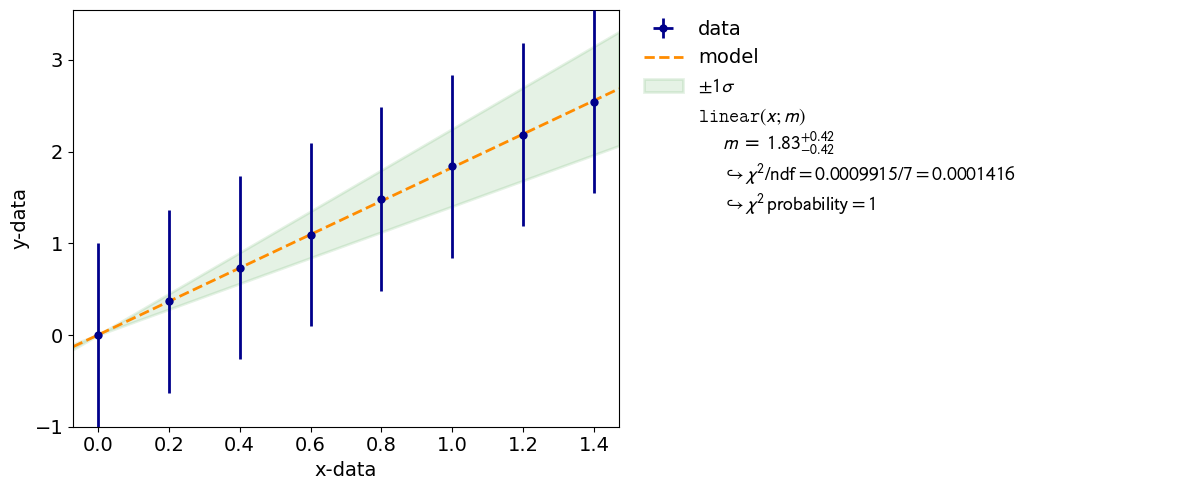

return Minos error 9.95752e-10  , -2.43114e-10


In [15]:
params,_,_,_ = ppk.k2Fit(linear, t[:8], y_data[:8])